In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('merged_data_cleaned.csv')
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [3]:
df.shape

(1339, 44)

In [4]:
print("Columns:\n", df.columns.tolist())

Columns:
 ['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers', 'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body', 'Certification.Address', 'Certification.Contact', 'unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']


In [5]:
# Descriptive statistics
df.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1338.000000,1339.000000,1109.000000,1109.000000,1109.000000
mean,669.000000,154.182972,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,7.503376,82.089851,0.088379,0.479462,0.173393,3.556385,1750.713315,1799.347775,1775.030545
std,386.680316,129.987162,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.473464,3.500575,0.048287,2.549683,0.832121,5.312541,8669.440545,8668.805771,8668.626080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,334.500000,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,669.000000,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,1003.500000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1338.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [6]:
print("Missing values:\n", df.isnull().sum().sort_values(ascending=False))

Missing values:
 Lot.Number               1063
Farm.Name                 359
Mill                      318
Color                     270
Producer                  232
altitude_low_meters       230
altitude_high_meters      230
altitude_mean_meters      230
Altitude                  226
Variety                   226
Company                   209
Processing.Method         170
ICO.Number                159
Region                     59
Harvest.Year               47
Owner                       7
Owner.1                     7
Quakers                     1
Country.of.Origin           1
Category.Two.Defects        0
Moisture                    0
Category.One.Defects        0
unit_of_measurement         0
Expiration                  0
Certification.Body          0
Certification.Address       0
Certification.Contact       0
Cupper.Points               0
Total.Cup.Points            0
Unnamed: 0                  0
Sweetness                   0
Clean.Cup                   0
Uniformity             

In [7]:
#select important features according to research

safe_columns = [
    # Sensory evaluation
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
    'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
    'Cupper.Points', 'Total.Cup.Points',

    # Environmental & Processing
    'Altitude', 'Moisture', 'Color', 'Processing.Method',

    # Genetic & Geographical
    'Species', 'Variety', 'Country.of.Origin',

    # Defects
    'Category.One.Defects', 'Category.Two.Defects', 'Quakers'
]

df = df[safe_columns]

In [8]:
#get mean as a numerical value instead of range

df[['altitude_low', 'altitude_high']] = df['Altitude'].str.extract(r'(\d+)-?(\d+)?').astype(float)
df['altitude_mean'] = df[['altitude_low', 'altitude_high']].mean(axis=1)
df.drop(columns=['Altitude'], inplace=True)

In [9]:
#drop empty rows of total cup points
df.dropna(subset=['Total.Cup.Points'], inplace=True)

In [10]:
#fill missing values of numerical columns with column mean

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [11]:
#fill missing values with mode

categorical_cols = ['Processing.Method', 'Color', 'Species', 'Variety', 'Country.of.Origin']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
#one hot encoding
df = pd.get_dummies(df, columns=categorical_cols)

In [13]:
print("Preprocessed dataset shape:", df.shape)
df.head()

Preprocessed dataset shape: (1339, 93)


,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,...,Country.of.Origin_Rwanda,Country.of.Origin_Taiwan,"Country.of.Origin_Tanzania, United Republic Of",Country.of.Origin_Thailand,Country.of.Origin_Uganda,Country.of.Origin_United States,Country.of.Origin_United States (Hawaii),Country.of.Origin_United States (Puerto Rico),Country.of.Origin_Vietnam,Country.of.Origin_Zambia
0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,...,False,False,False,False,False,False,False,False,False,False
1,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,...,False,False,False,False,False,False,False,False,False,False
2,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,...,False,False,False,False,False,False,False,False,False,False
3,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,...,False,False,False,False,False,False,False,False,False,False
4,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,...,False,False,False,False,False,False,False,False,False,False


In [14]:
print("Columns:\n", df.columns.tolist())   #list of columns

Columns:
 ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Category.Two.Defects', 'Quakers', 'altitude_low', 'altitude_high', 'altitude_mean', 'Processing.Method_Natural / Dry', 'Processing.Method_Other', 'Processing.Method_Pulped natural / honey', 'Processing.Method_Semi-washed / Semi-pulped', 'Processing.Method_Washed / Wet', 'Color_Blue-Green', 'Color_Bluish-Green', 'Color_Green', 'Species_Arabica', 'Species_Robusta', 'Variety_Arusha', 'Variety_Blue Mountain', 'Variety_Bourbon', 'Variety_Catimor', 'Variety_Catuai', 'Variety_Caturra', 'Variety_Ethiopian Heirlooms', 'Variety_Ethiopian Yirgacheffe', 'Variety_Gesha', 'Variety_Hawaiian Kona', 'Variety_Java', 'Variety_Mandheling', 'Variety_Marigojipe', 'Variety_Moka Peaberry', 'Variety_Mundo Novo', 'Variety_Other', 'Variety_Pacamara', 'Variety_Pacas', 'Variety_Pache Comun', 'Variety_Peaberry', 'Variety_Ruiru 11'

In [15]:
# Check if any missing values remain
print("Missing values:\n", df.isnull().sum().sort_values(ascending=False))

Missing values:
 Aroma                          0
Country.of.Origin_China        0
Country.of.Origin_Honduras     0
Country.of.Origin_Haiti        0
Country.of.Origin_Guatemala    0
                              ..
Variety_Blue Mountain          0
Variety_Arusha                 0
Species_Robusta                0
Species_Arabica                0
Country.of.Origin_Zambia       0
Length: 93, dtype: int64


In [16]:
#number of one hot encoded columns

encoded_cols = [col for col in df.columns if "_" in col and any(cat in col for cat in ['Species', 'Color', 'Country.of.Origin', 'Variety', 'Processing.Method'])]
print("Number of one-hot encoded columns:", len(encoded_cols))

Number of one-hot encoded columns: 75


In [17]:
from sklearn.preprocessing import LabelEncoder   #binning

# binning function
def bin_quality(score):
    if score < 80:
        return 'Low'
    elif score < 85:
        return 'Medium'
    else:
        return 'High'

# Create new classification target
df['Quality_Label'] = df['Total.Cup.Points'].apply(bin_quality)

# Encode labels to integers
le = LabelEncoder()
df['Quality_Label_Encoded'] = le.fit_transform(df['Quality_Label'])

# Show label mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding Mapping:", label_mapping)

# Show distribution of classes
df['Quality_Label'].value_counts()

Label Encoding Mapping: {'High': 0, 'Low': 1, 'Medium': 2}


Quality_Label
Medium    1046
Low        187
High       106
Name: count, dtype: int64

In [18]:
print("Dataset shape:", df.shape)

Dataset shape: (1339, 95)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop(columns=['Total.Cup.Points', 'Quality_Label', 'Quality_Label_Encoded'])
y = df['Quality_Label_Encoded']

# Split into training and test sets (80/20) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# StandardScaler for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set size: (1071, 92)
Test set size: (268, 92)


In [20]:
# View shapes of all data splits
print("Final Data Splits:")
print(f"X_train shape:         {X_train.shape}")
print(f"X_train_scaled shape:  {X_train_scaled.shape}")
print(f"X_test shape:          {X_test.shape}")
print(f"X_test_scaled shape:   {X_test_scaled.shape}")
print(f"y_train shape:         {y_train.shape}")
print(f"y_test shape:          {y_test.shape}")

# Class distribution in y_train (to confirm stratification)
print("\n Class Distribution in y_train:")
print(y_train.value_counts())

Final Data Splits:
X_train shape:         (1071, 92)
X_train_scaled shape:  (1071, 92)
X_test shape:          (268, 92)
X_test_scaled shape:   (268, 92)
y_train shape:         (1071,)
y_test shape:          (268,)

 Class Distribution in y_train:
Quality_Label_Encoded
2    837
1    149
0     85
Name: count, dtype: int64


SVM Classifier Performance:

Accuracy: 0.8955223880597015

Classification Report:
               precision    recall  f1-score   support

        High       0.91      0.48      0.62        21
         Low       0.96      0.61      0.74        38
      Medium       0.89      0.99      0.94       209

    accuracy                           0.90       268
   macro avg       0.92      0.69      0.77       268
weighted avg       0.90      0.90      0.88       268



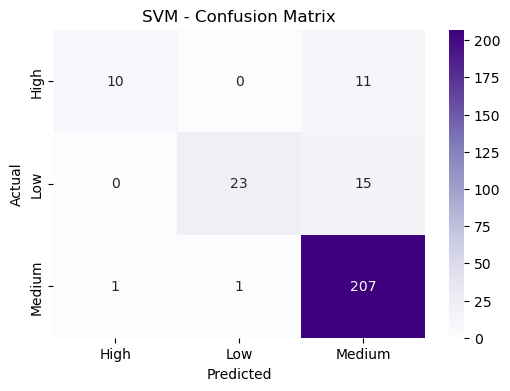

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the SVM model (RBF kernel)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate
print("SVM Classifier Performance:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, target_names=le.classes_))

# Confusion matrix plot
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_17956\3878380879.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Quality_Label', data=df, order=['Low', 'Medium', 'High'], palette='Set2')


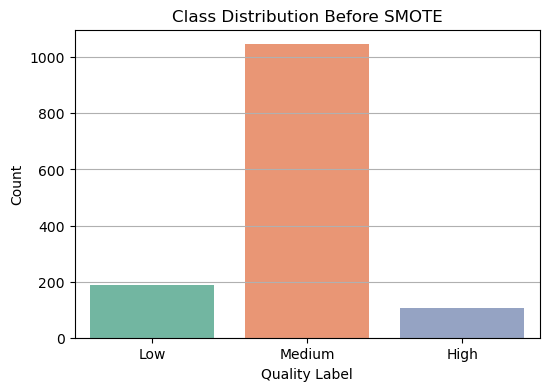

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the class distribution before SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x='Quality_Label', data=df, order=['Low', 'Medium', 'High'], palette='Set2')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Quality Label')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


In [23]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Confirm SMOTE output
print("SMOTE class distribution:", np.unique(y_train_smote, return_counts=True))


SMOTE class distribution: (array([0, 1, 2]), array([837, 837, 837], dtype=int64))


In [25]:
import pandas as pd

# Create a new DataFrame from y_train_smote
smote_df = pd.DataFrame(y_train_smote, columns=['Quality_Label_After_SMOTE'])

# Now map numbers back to names
label_mapping = {0: 'High', 1: 'Low', 2: 'Medium'}
smote_df['Quality_Label_After_SMOTE'] = smote_df['Quality_Label_After_SMOTE'].map(label_mapping)

SMOTE sample counts: (array([0, 1, 2]), array([837, 837, 837], dtype=int64))


C:\Users\pc\AppData\Local\Temp\ipykernel_17956\3484179563.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Quality_Label_After_SMOTE', data=smote_df, order=['High', 'Medium', 'Low'], palette='Set2')


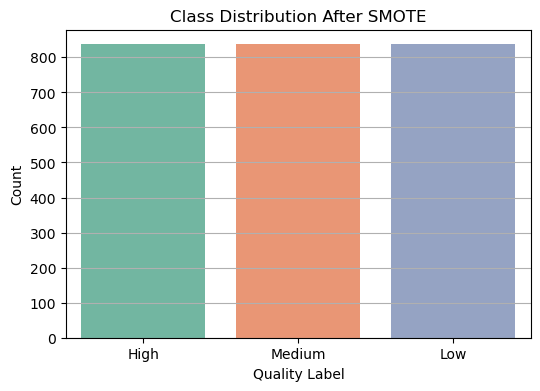

In [26]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check result
print("SMOTE sample counts:", np.unique(y_train_smote, return_counts=True))

# Create DataFrame
smote_df = pd.DataFrame({'Quality_Label_After_SMOTE': y_train_smote})

# Map numbers to text labels
label_mapping = {0: 'High', 1: 'Low', 2: 'Medium'}
smote_df['Quality_Label_After_SMOTE'] = smote_df['Quality_Label_After_SMOTE'].map(label_mapping)

# Plot
plt.figure(figsize=(6,4))
sns.countplot(x='Quality_Label_After_SMOTE', data=smote_df, order=['High', 'Medium', 'Low'], palette='Set2')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Quality Label')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

SVM Classifier Performance After SMOTE:
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        21
           1       0.81      0.76      0.78        38
           2       0.94      0.93      0.94       209

    accuracy                           0.90       268
   macro avg       0.82      0.84      0.82       268
weighted avg       0.90      0.90      0.90       268



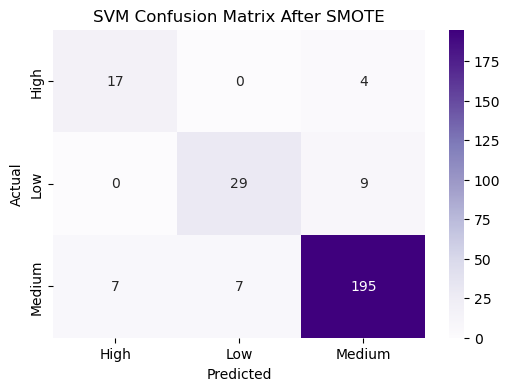

SVC(random_state=42)

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# train a new SVM model on SMOTE-balanced data
svm_model_smote = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model_smote.fit(X_train_smote, y_train_smote)

# Predict on original test set (X_test_scaled)
y_pred_smote = svm_model_smote.predict(X_test_scaled)

# Evaluate the model
print("SVM Classifier Performance After SMOTE:")
print(classification_report(y_test, y_pred_smote))

# confusion matrix
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Purples',
            xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
plt.title("SVM Confusion Matrix After SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

svm_model_smote

In [28]:
from sklearn.metrics import f1_score

# Calculate F1-score (macro average) before SMOTE
f1_before_smote = f1_score(y_test, y_pred_svm, average='macro')

# Calculate F1-score (macro average) after SMOTE
f1_after_smote = f1_score(y_test, y_pred_smote, average='macro')

print(f"F1-Score before SMOTE: {f1_before_smote:.4f}")
print(f"F1-Score after SMOTE: {f1_after_smote:.4f}")

F1-Score before SMOTE: 0.7679
F1-Score after SMOTE: 0.8249


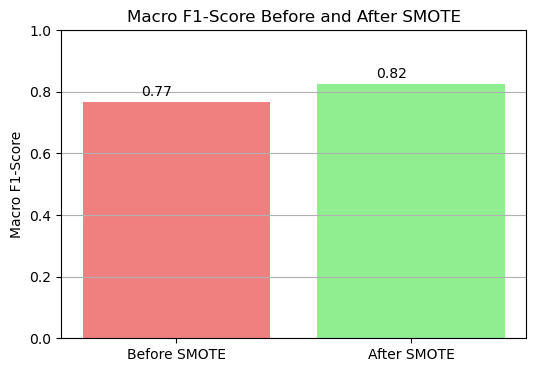

In [29]:
import matplotlib.pyplot as plt

# Prepare data
scores = [f1_before_smote, f1_after_smote]
labels = ['Before SMOTE', 'After SMOTE']

# Plot
plt.figure(figsize=(6,4))
bars = plt.bar(labels, scores, color=['lightcoral', 'lightgreen'])
plt.ylim(0, 1)
plt.title('Macro F1-Score Before and After SMOTE')
plt.ylabel('Macro F1-Score')
plt.grid(axis='y')

# Annotate bars with exact values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.25, yval + 0.02, f"{yval:.2f}")

plt.show()

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Metrics before SMOTE
accuracy_before = accuracy_score(y_test, y_pred_svm)
precision_before = precision_score(y_test, y_pred_svm, average='macro')
recall_before = recall_score(y_test, y_pred_svm, average='macro')
f1_before = f1_score(y_test, y_pred_svm, average='macro')

# Metrics after SMOTE
accuracy_after = accuracy_score(y_test, y_pred_smote)
precision_after = precision_score(y_test, y_pred_smote, average='macro')
recall_after = recall_score(y_test, y_pred_smote, average='macro')
f1_after = f1_score(y_test, y_pred_smote, average='macro')

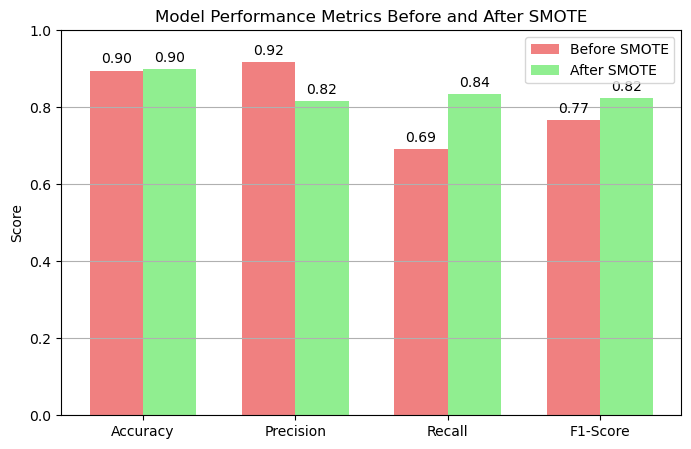

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Scores
before_smote = [accuracy_before, precision_before, recall_before, f1_before]
after_smote = [accuracy_after, precision_after, recall_after, f1_after]

# X-axis positions
x = np.arange(len(metrics))  

# Width of bars
width = 0.35  

# Plot
fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, before_smote, width, label='Before SMOTE', color='lightcoral')
rects2 = ax.bar(x + width/2, after_smote, width, label='After SMOTE', color='lightgreen')

# Labels and titles
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics Before and After SMOTE')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

# Annotate bars
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.grid(axis='y')
plt.show()

In [32]:
# List of true numeric features
numerical_features = [
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
    'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
    'Cupper.Points', 'Moisture', 'Category.One.Defects',
    'Category.Two.Defects', 'Quakers', 'altitude_low', 'altitude_high', 'altitude_mean'
]

# Create DataFrames using only numerical columns
X_train_numerical = pd.DataFrame(X_train_scaled, columns=X.columns)[numerical_features]
X_train_smote_numerical = pd.DataFrame(X_train_smote, columns=X.columns)[numerical_features]

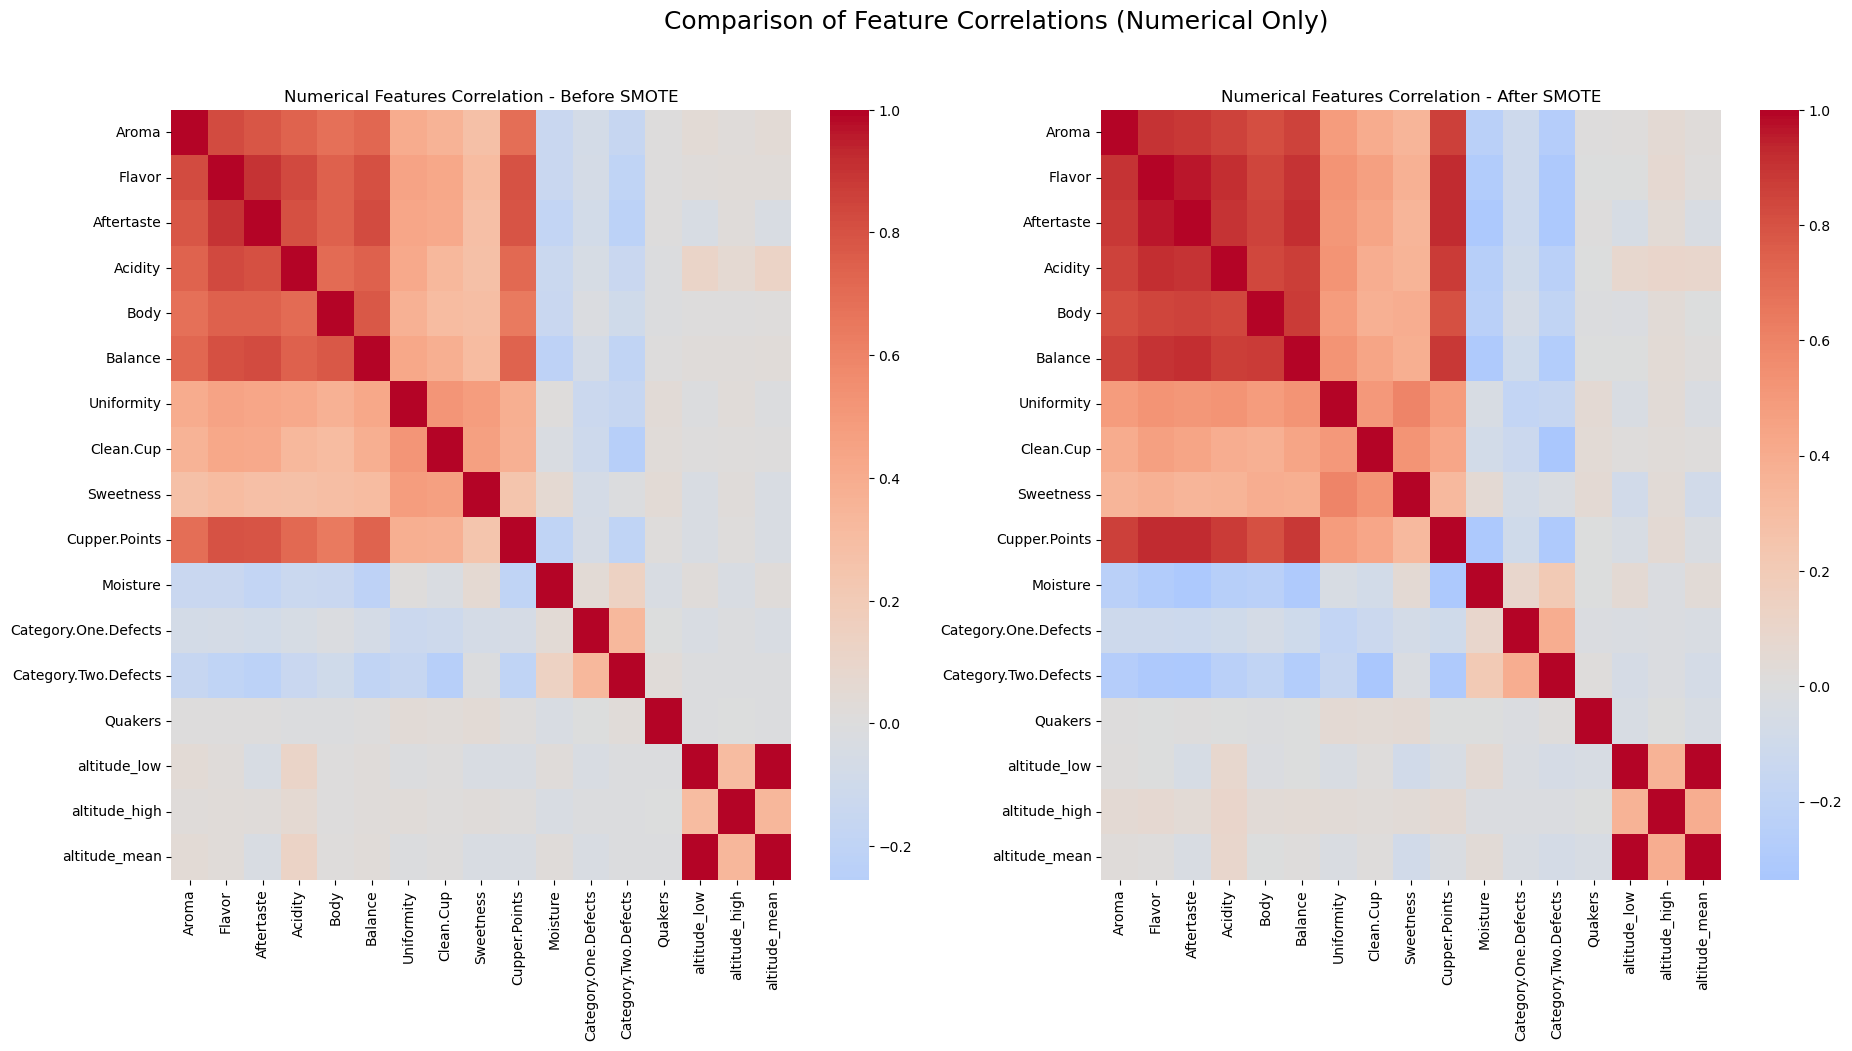

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrices
corr_before = X_train_numerical.corr()
corr_after = X_train_smote_numerical.corr()

# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(22,10))

sns.heatmap(corr_before, cmap='coolwarm', center=0, ax=axes[0], annot=False)
axes[0].set_title('Numerical Features Correlation - Before SMOTE')

sns.heatmap(corr_after, cmap='coolwarm', center=0, ax=axes[1], annot=False)
axes[1].set_title('Numerical Features Correlation - After SMOTE')

plt.suptitle('Comparison of Feature Correlations (Numerical Only)', fontsize=18)
plt.show()

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
# Predict using Decision Tree
y_pred_dt = dt_model.predict(X_test)

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.88      0.79      0.83        38
           2       0.95      0.96      0.95       209

    accuracy                           0.93       268
   macro avg       0.88      0.87      0.88       268
weighted avg       0.93      0.93      0.93       268

Accuracy: 0.9291044776119403


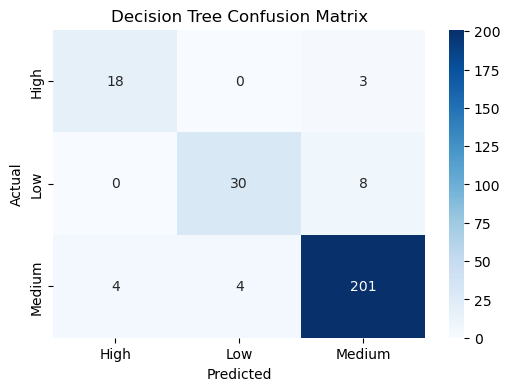

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print classification report
print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
# Parameter grid to search
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

In [40]:
# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [41]:
# Best parameters and best model
print("Best Parameters:", grid_search.best_params_)
best_dt_model = grid_search.best_estimator_

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


Tuned Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        21
           1       0.85      0.76      0.81        38
           2       0.93      0.96      0.95       209

    accuracy                           0.92       268
   macro avg       0.88      0.83      0.85       268
weighted avg       0.92      0.92      0.92       268

Accuracy after tuning: 0.917910447761194


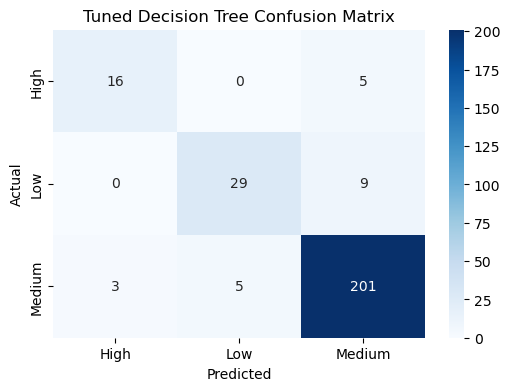

In [42]:
# Predict with best model
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluation
print("Tuned Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_best_dt))

# Accuracy
print("Accuracy after tuning:", accuracy_score(y_test, y_pred_best_dt))

# Confusion Matrix
conf_matrix_best_dt = confusion_matrix(y_test, y_pred_best_dt)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_best_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
plt.title("Tuned Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Metrics before tuning (original dt_model)
accuracy_before_dt = accuracy_score(y_test, y_pred_dt)
precision_before_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_before_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_before_dt = f1_score(y_test, y_pred_dt, average='macro')

# Metrics after tuning (best_dt_model)
accuracy_after_dt = accuracy_score(y_test, y_pred_best_dt)
precision_after_dt = precision_score(y_test, y_pred_best_dt, average='macro')
recall_after_dt = recall_score(y_test, y_pred_best_dt, average='macro')
f1_after_dt = f1_score(y_test, y_pred_best_dt, average='macro')

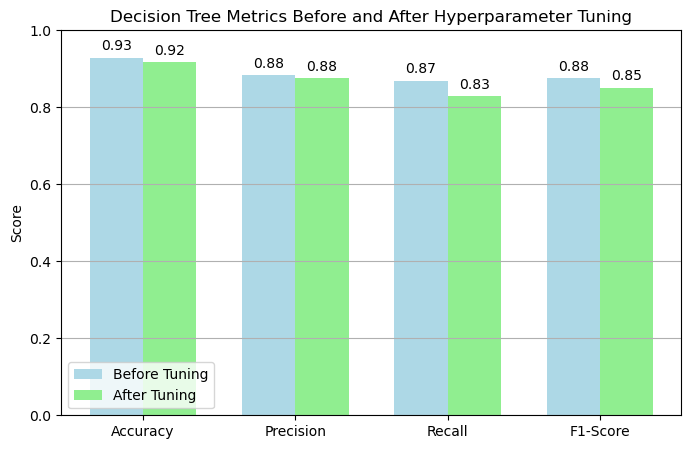

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Metric names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Scores
before_tuning = [accuracy_before_dt, precision_before_dt, recall_before_dt, f1_before_dt]
after_tuning = [accuracy_after_dt, precision_after_dt, recall_after_dt, f1_after_dt]

# X-axis
x = np.arange(len(metrics))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, before_tuning, width, label='Before Tuning', color='lightblue')
rects2 = ax.bar(x + width/2, after_tuning, width, label='After Tuning', color='lightgreen')

# Labels and titles
ax.set_ylabel('Score')
ax.set_title('Decision Tree Metrics Before and After Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

# Annotate bars
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.grid(axis='y')
plt.show()

In [45]:
# Get feature importances before tuning
importances_before = dt_model.feature_importances_

# Get feature importances after tuning
importances_after = best_dt_model.feature_importances_

# Feature names
feature_names = X.columns

In [46]:
import pandas as pd

# Before tuning
feature_importance_before = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_before
}).sort_values(by='Importance', ascending=False)

# After tuning
feature_importance_after = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_after
}).sort_values(by='Importance', ascending=False)

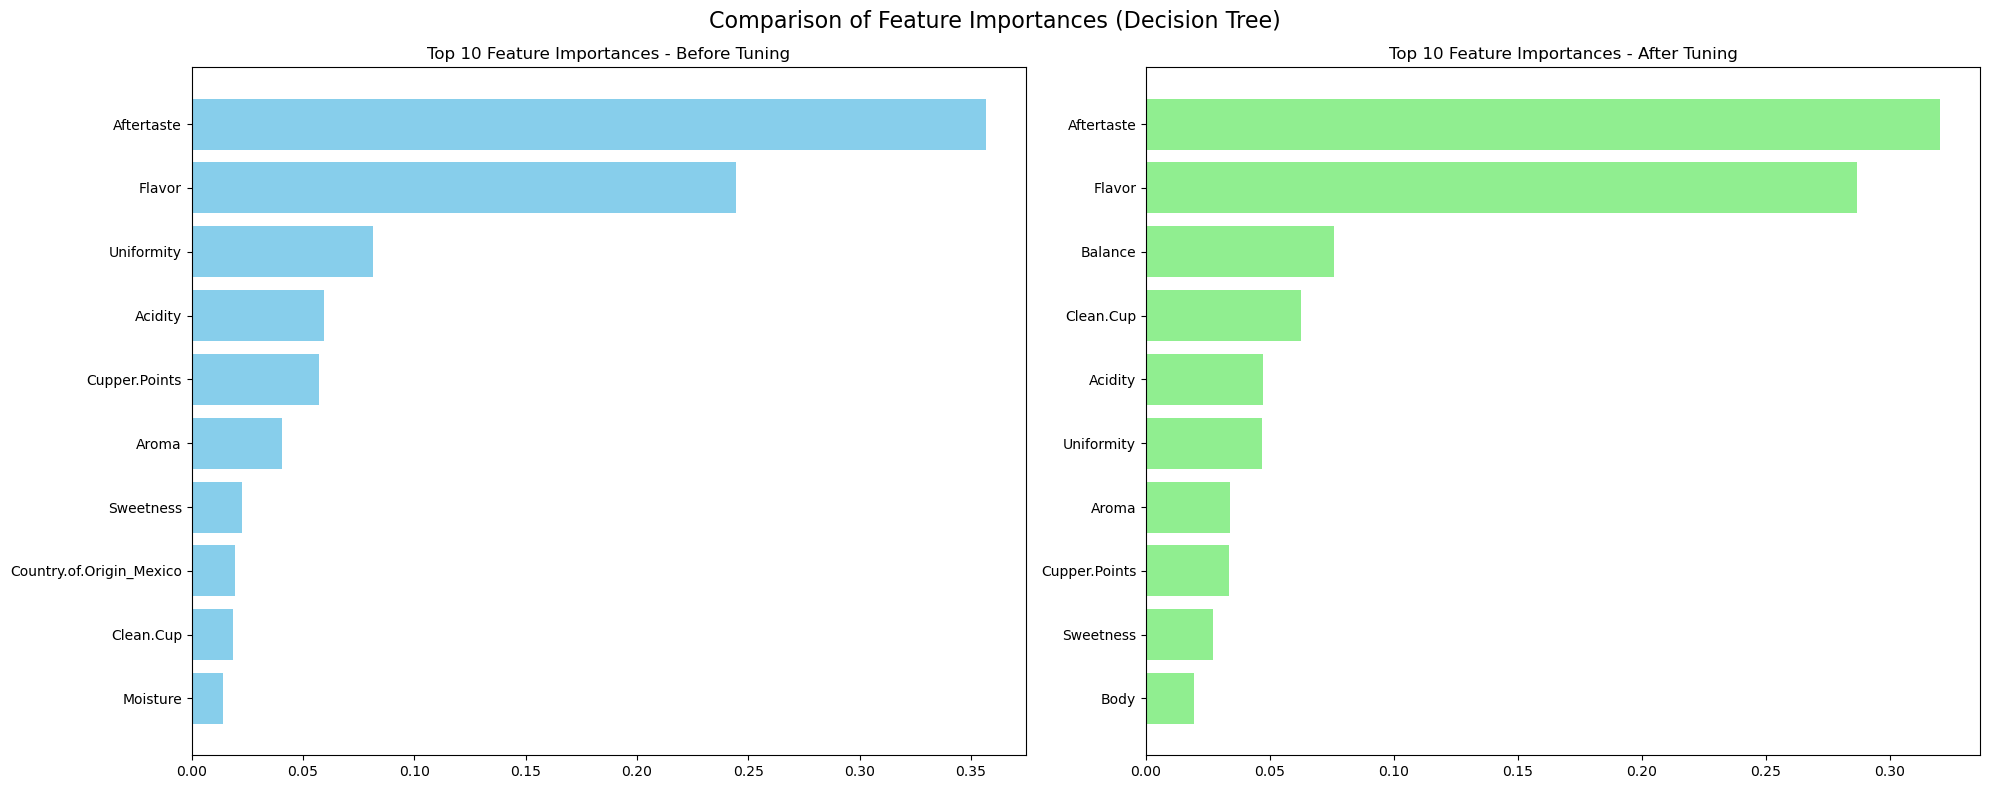

In [47]:
import matplotlib.pyplot as plt

# Plot
fig, axes = plt.subplots(1, 2, figsize=(20,8))

# Before tuning
axes[0].barh(feature_importance_before['Feature'].head(10), 
             feature_importance_before['Importance'].head(10), color='skyblue')
axes[0].set_title('Top 10 Feature Importances - Before Tuning')
axes[0].invert_yaxis()

# After tuning
axes[1].barh(feature_importance_after['Feature'].head(10), 
             feature_importance_after['Importance'].head(10), color='lightgreen')
axes[1].set_title('Top 10 Feature Importances - After Tuning')
axes[1].invert_yaxis()

plt.suptitle('Comparison of Feature Importances (Decision Tree)', fontsize=16)
plt.tight_layout()
plt.show()

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# SVM before SMOTE 
accuracy_svm_before = accuracy_score(y_test, y_pred_svm)
precision_svm_before = precision_score(y_test, y_pred_svm, average='macro')
recall_svm_before = recall_score(y_test, y_pred_svm, average='macro')
f1_svm_before = f1_score(y_test, y_pred_svm, average='macro')

# Decision Tree before tuning 
accuracy_dt_before = accuracy_score(y_test, y_pred_dt)
precision_dt_before = precision_score(y_test, y_pred_dt, average='macro')
recall_dt_before = recall_score(y_test, y_pred_dt, average='macro')
f1_dt_before = f1_score(y_test, y_pred_dt, average='macro')

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Organize data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

svm_before_values = [accuracy_svm_before, precision_svm_before, recall_svm_before, f1_svm_before]
dt_before_values = [accuracy_dt_before, precision_dt_before, recall_dt_before, f1_dt_before]

# Create DataFrame
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'SVM (Before SMOTE)': svm_before_values,
    'Decision Tree (Before Tuning)': dt_before_values
})
comparison_df.set_index('Metric', inplace=True)
# Display table
print(comparison_df.round(3))

           SVM (Before SMOTE)  Decision Tree (Before Tuning)
Metric                                                      
Accuracy                0.896                          0.929
Precision               0.919                          0.883
Recall                  0.691                          0.869
F1-Score                0.768                          0.875


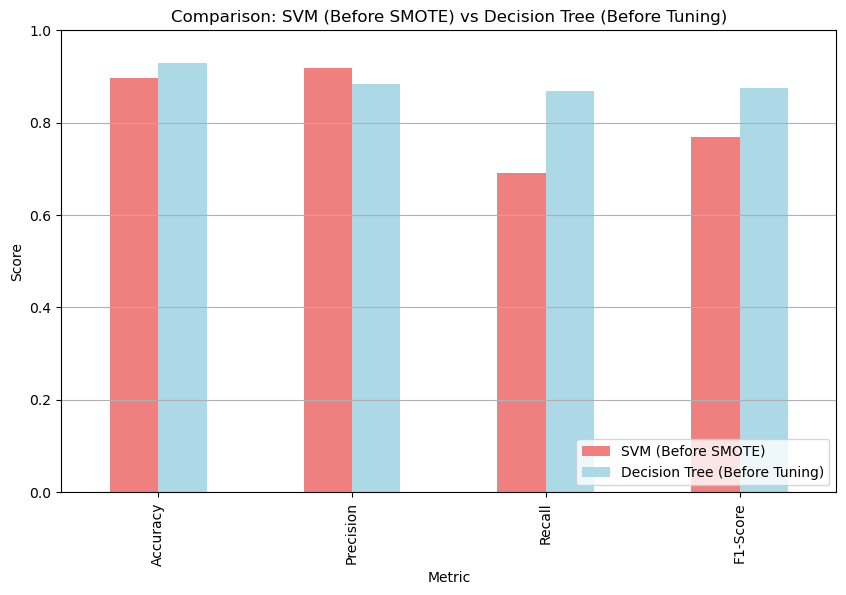

In [50]:
import matplotlib.pyplot as plt

# Plot
comparison_df.plot(kind='bar', figsize=(10,6), color=['lightcoral', 'lightblue'])
plt.title('Comparison: SVM (Before SMOTE) vs Decision Tree (Before Tuning)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.show()

In [51]:
# SVM after SMOTE
accuracy_svm_after = accuracy_score(y_test, y_pred_smote)
precision_svm_after = precision_score(y_test, y_pred_smote, average='macro')
recall_svm_after = recall_score(y_test, y_pred_smote, average='macro')
f1_svm_after = f1_score(y_test, y_pred_smote, average='macro')

# Decision Tree after tuning
accuracy_dt_after = accuracy_score(y_test, y_pred_best_dt)
precision_dt_after = precision_score(y_test, y_pred_best_dt, average='macro')
recall_dt_after = recall_score(y_test, y_pred_best_dt, average='macro')
f1_dt_after = f1_score(y_test, y_pred_best_dt, average='macro')

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Organize data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

svm_after_values = [accuracy_svm_after, precision_svm_after, recall_svm_after, f1_svm_after]
dt_after_values = [accuracy_dt_after, precision_dt_after, recall_dt_after, f1_dt_after]

# Create DataFrame
comparison_final_df = pd.DataFrame({
    'Metric': metrics,
    'SVM (After SMOTE)': svm_after_values,
    'Decision Tree (After Tuning)': dt_after_values
})
comparison_final_df.set_index('Metric', inplace=True)
# Display table
print(comparison_final_df.round(3))

           SVM (After SMOTE)  Decision Tree (After Tuning)
Metric                                                    
Accuracy               0.899                         0.918
Precision              0.817                         0.877
Recall                 0.835                         0.829
F1-Score               0.825                         0.851


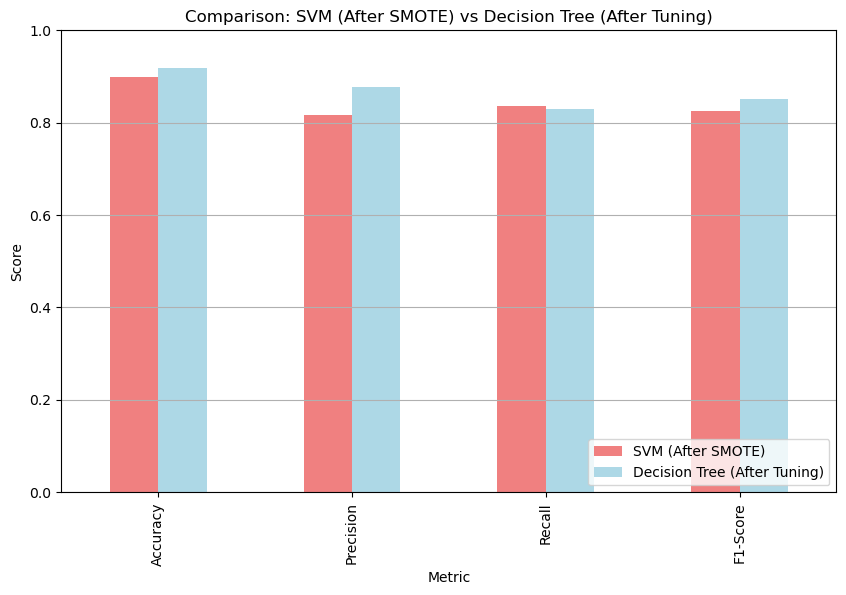

In [53]:
# Plot
comparison_final_df.plot(kind='bar', figsize=(10,6), color=['lightcoral', 'lightblue'])
plt.title('Comparison: SVM (After SMOTE) vs Decision Tree (After Tuning)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.show()

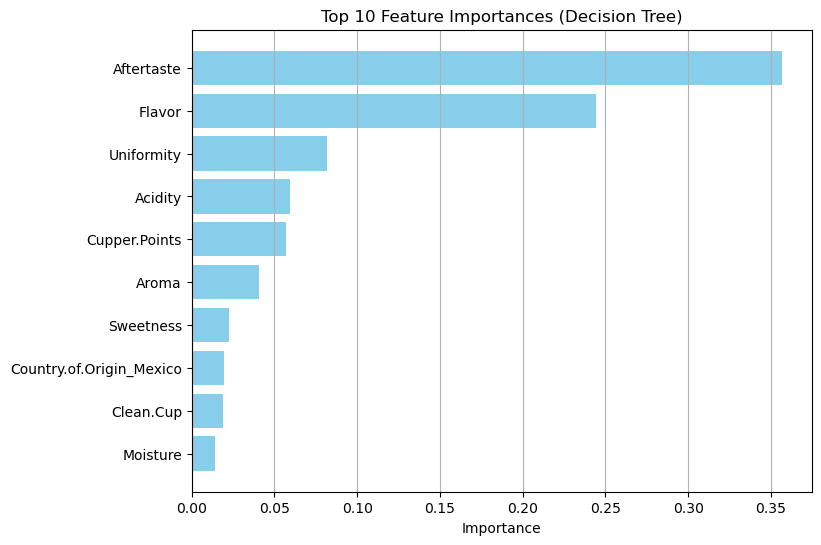

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained Decision Tree
importances = dt_model.feature_importances_
feature_names = X.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance (highest first)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Top 10 Features
plt.figure(figsize=(8,6))
plt.barh(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10), color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x')
plt.show()